In [1]:
from __future__ import absolute_import,division, print_function
# for word embedding
import codecs

#reg
import glob

#concurrency

import multiprocessing
#dealing with os like reading file
import os

#pretty printing,human readable

import pprint

import re

#nlp
import nltk
#word 3 vec 

import gensim.models.word2vec as w2v
#DR

import sklearn.manifold

#math 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import h2o


Using TensorFlow backend.


In [3]:
h2o.init()

#1
#processs our data, clean data
nltk.download('punkt')
nltk.download('stopwords')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_131"; Java(TM) SE Runtime Environment (build 1.8.0_131-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /usr/local/lib/python2.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4XEflr
  JVM stdout: /tmp/tmp4XEflr/h2o_roshan_started_from_python.out
  JVM stderr: /tmp/tmp4XEflr/h2o_roshan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,4 months and 4 days !!!
H2O cluster name:,H2O_from_python_roshan_m6e6ey
H2O cluster total nodes:,1
H2O cluster free memory:,811 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


[nltk_data] Downloading package punkt to /home/roshan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/roshan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# get the  book name 
book_filenames = sorted(glob.glob("data/*.txt"))

In [5]:
print("Found Books:")
book_filenames

Found Books:


['data/alex.txt',
 'data/got1.txt',
 'data/got2.txt',
 'data/got3.txt',
 'data/got4.txt',
 'data/got5.txt']

In [6]:
#Combine the books into one string

corpus_raw =u""
for book_filename in book_filenames:
    print("reading '{0}'...".format(book_filename))
    with codecs.open(book_filename,"r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("corpus is now {0} characters long".format(len(corpus_raw)))
    

reading 'data/alex.txt'...
corpus is now 167553 characters long
reading 'data/got1.txt'...
corpus is now 1938212 characters long
reading 'data/got2.txt'...
corpus is now 4238594 characters long
reading 'data/got3.txt'...
corpus is now 6558958 characters long
reading 'data/got4.txt'...
corpus is now 8275498 characters long
reading 'data/got5.txt'...
corpus is now 9887038 characters long


In [7]:
# split the corpus into sentences

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


In [8]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [9]:
def sentence_to_wordlist(raw):
    clean =re.sub("[^a-zA-Z]"," ",raw)
    words =clean.split()
    return words

In [10]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [11]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

I shall be late!’ (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but when the Rabbit actually TOOK A WATCH
OUT OF ITS WAISTCOAT-POCKET, and looked at it, and then hurried on,
Alice started to her feet, for it flashed across her mind that she had
never before seen a rabbit with either a waistcoat-pocket, or a watch
to take out of it, and burning with curiosity, she ran across the field
after it, and fortunately was just in time to see it pop down a large
rabbit-hole under the hedge.
[u'I', u'shall', u'be', u'late', u'when', u'she', u'thought', u'it', u'over', u'afterwards', u'it', u'occurred', u'to', u'her', u'that', u'she', u'ought', u'to', u'have', u'wondered', u'at', u'this', u'but', u'at', u'the', u'time', u'it', u'all', u'seemed', u'quite', u'natural', u'but', u'when', u'the', u'Rabbit', u'actually', u'TOOK', u'A', u'WATCH', u'OUT', u'OF', u'ITS', u'WAISTCOAT', u'POCKET', u'and', u'look

In [12]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book ccoepus contain {0:,} tokens" .format(token_count))

The book ccoepus contain 1,848,526 tokens


In [13]:
# Unicode is the format needed for vector 
# Utf-8 format for reading files.

# Train WORD2VEC
# once we have vectors 3 main task-
# Distance ,similarity, ranking.

questions = 'testdata/got_test.text'
evals = open(questions, 'r').readlines()
print(len(evals))
num_sections = len([l for l in evals if l.startswith(':')])
print('total evaluation sentences: {} '.format(len(evals) - num_sections))

465
total evaluation sentences: 464 


In [14]:
#train, test = train_test_split(corpus_raw, train_size = 0.8)
#print()

In [15]:
# dimensionality of the resulting word vectors
num_features = 300
#min word count 
min_word_count = 3
#num of thread to run in parrel 
num_workers = multiprocessing.cpu_count()
# context window size
context_size = 10
# downsampling setting for frequent words.
downsampling =1e-3
#seed for the RNG, to make the results reproducible
seed =1


In [14]:
box= w2v.Word2Vec(
    sg=0,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [15]:
box.build_vocab(sentences)

In [16]:
#thrones.wv.vocab

print("Word2Vec vocabulary length:", len(box.wv.vocab))

Word2Vec vocabulary length: 17563


In [433]:

#NOTE: It is impossible to continue training the vectors 
#loaded from the C format because hidden weights, 
#vocabulary frequency and the binary tree is missing.
#thrones2vec.train(sentences.sentences_perm, total_examples=model.corpus_count, epochs=model.iter())
##for epoch in range(10):
  #  thrones2vec.train(sentences, total_examples=23, epochs=21)
#thrones2vec.wv.train(sentences)

In [434]:
box.train(sentences, total_examples=box.corpus_count, epochs=box.iter)

7138364

In [254]:
#if not os.path.exists("trainedD12T2"):
   # os.makedirs("trainedD12T2")


In [255]:
#model.save(os.path.join("trainedD12T2", "thrones2vec.w2v"))

In [256]:
#model = w2v.Word2Vec.load(os.path.join("trainedD12T2", "thrones2vec.w2v"))

In [257]:
#visualize a dataset easily
#tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [425]:
#thrones2vec.wv.accuracy('testdata/questions-words.txt')


In [435]:
def w2v_model_accuracy(box):

    accuracy = box.accuracy(questions)
    
    sum_corr = len(accuracy[-1]['correct'])
    sum_incorr = len(accuracy[-1]['incorrect'])
    
    total = sum_corr + sum_incorr
    percent = lambda a: a / total * 100
    
    
    print('Total sentences: {},Correct: {:.2f}%, Incorrect: {:.2f}%'.format(total, percent(sum_corr),percent(sum_incorr)))
    

In [436]:
box.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)


[(u'queen', 0.831631600856781),
 (u'child', 0.7051635384559631),
 (u'traitor', 0.6996519565582275),
 (u'prince', 0.6903233528137207),
 (u'Queen', 0.679245114326477)]

In [414]:
#thrones2vec.wv.accuracy('testdata/questions-words.txt')
#model.similarity('girl','woman')
#box.wv.accuracy('testdata/got_test.text')


In [437]:
#thrones2vec.wv.accuracy(os.path.join('testdata', 'questions-words.txt'))
print(box)

Word2Vec(vocab=17563, size=300, alpha=0.025)


In [27]:
#thrones2vec.evaluate(os.path.join('testdata', 'questions-words.txt'))
#thrones2vec.most_similar(positive=['two', 'three'], negative=['one'], topn=10)
#thrones2vec.wv.acy(qaccuruestions)

In [438]:
print(w2v_model_accuracy(box))
#thrones2vec.similarity('three','one')

Total sentences: 272,Correct: 40.81%, Incorrect: 59.19%
None


In [301]:
#thrones2vec.wv.most_similar_cosmul(positive=['two', 'three'], negative=['one'])

In [302]:
#model.most_similar(positive=['two', 'three'], negative=['one'], topn=5)
#questions, restrict_vocab=30000, most_similar=None, case_insensitive=True

In [439]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = box.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [440]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Lady is related to Riverrun
Jaime is related to sword, as Alayne is related to wine
Arya is related to Nymeria, as things is related to dragons


u'things'

In [441]:
box.doesnt_match("man woman child kitchen".split())

'kitchen'

In [442]:
box.n_similarity("man" ,"woman" )
#cbow=[9.17,6,17,.45,7,8,9.72,9.83]
#per=cbow10

0.97162615470753888

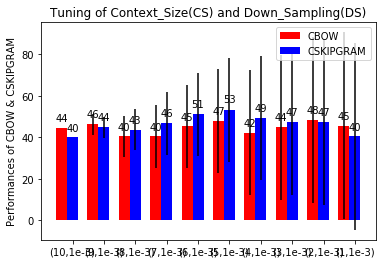

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
#cbow= (83,110, 85, 80, 83,82,115,115)

cbow = (44.49,46.32,40.44,40.44,45.22,47.76,42.28,44.85,48.16,45.59)
        
distances1= (0, 5, 10, 15, 20,25,30,35,40,45)

ind = np.arange(N)  # the x locations for the cosine distances
width = 0.35     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, cbow, width, color='r', yerr=distances1)
#ax.axhline(linewidth=4,)        # inc. width of x-axis and color it green
 
#cskipgram = (83, 79, 80, 80, 78,53,70,110)
cskipgram = (40, 44.85,43.75,46.69,51.10,53.13,49.26,47.43,47.43,40.44)
distances2= (0, 5, 10, 15, 20,25,30,35,40,45)
rects2 = ax.bar(ind + width, cskipgram, width, color='b', yerr=distances2)
#ax.axvline(linewidth=4)
# add some text for labels, title and axes ticks
ax.set_ylabel('Performances of CBOW & CSKIPGRAM')
#ax.set_label('lower the value ,better it is')
ax.set_title('Tuning of Context_Size(CS) and Down_Sampling(DS)')
#ax.set_title('Cosine similarity lower')
ax.set_xticks(ind + width)

ax.set_xticklabels(('(10,1e-3)','(9,1e-3)','(8,1e-3)','(7,1e-3)','(6,1e-3)','(5,1e-3)','(4,1e-3)','(3,1e-3)','(2,1e-3)','(1,1e-3)'))

ax.legend((rects1[0], rects2[0]), ('CBOW', 'CSKIPGRAM'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
#plt.savefig('cbcs.', dpi=300, bbox_inches='tight')
plt.savefig('cbcs.JPG')


In [45]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
cbow = (82,82,81 )
distances1= (10,50,100)


ind = np.arange(N)  # the x locations for the cosine distances
width = 0.28     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, cbow, width, color='r', yerr=distances1)

cskipgram= (83,79,81)
distances2= (10,50,100)
rects2 = ax.bar(ind + width, cskipgram, width, color='b', yerr=distances2)

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy of cbow and skipgram')
ax.set_title('Tuning of Context_Size(CS) and Down_Sampling(DS)')
ax.set_xticks(ind + width)
ax.set_xticklabels(('(5,1e-3)','(5,1e-4)','(5,1e-5)'))

ax.legend((rects1[0],rects2[0]),('CBOW', 'CSKIPGRAM'))


def autolabel(rects):
    
    
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width(), 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show

<function matplotlib.pyplot.show>

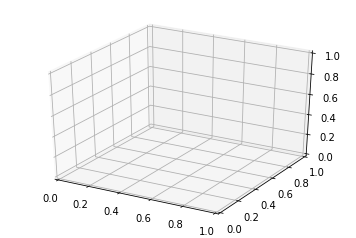

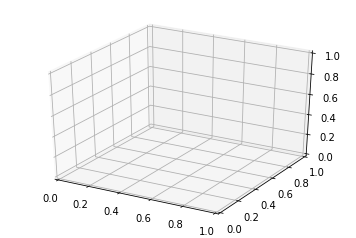

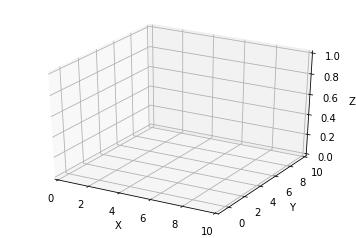

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0,10,20)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'),cc('b'),
                                         cc('g'),cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 10)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

In [ ]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

In [ ]:
import numpy
from mayavi.mlab import *

def test_barchart():
    """ Demo the bar chart plot with a 2D array.
    """
    s = numpy.abs(numpy.random.random((3, 3)))
    return barchart(s)


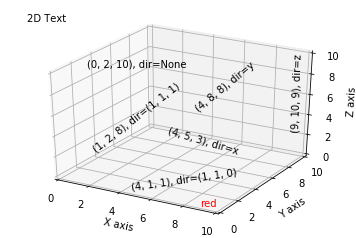

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (80, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

# Demo 2: color
ax.text(9, 0, 0, "red", color='red')

# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


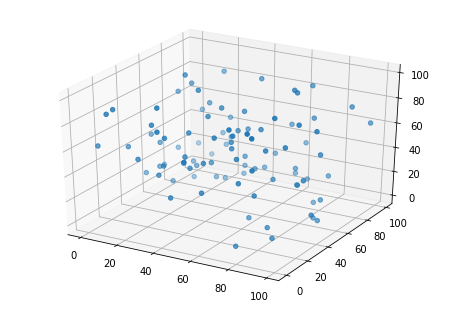

In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)
#-----------------------------------------------------------
'''
N = 3
cbow = (82,200 ,190 )
distances1= (10,50,100)


ind = np.arange(N)  # the x locations for the cosine distances
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, cbow, width, color='r', yerr=distances1)

cskipgram = (53,79,190 )
distances2 = (10,50,100)
rects2 = ax.bar(ind + width, cskipgram, width, color='b', yerr=distances2)

performance = (53,79,190 )
distances2= (10,50,100)
rects2 = ax.bar(ind + width, cskipgram, width, color='b', yerr=distances2)

# add some text for labels, title and axes ticks
ax.set_ylabel('Cosine Similarity Distances')
ax.set_title('Tuning of Context_Size(CS) and Down_Sampling(DS)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('(CS,DS:5,1e-3)', '(CS,DS:5,1e-4)', '(CS,DS:5,1e-5)'))

ax.legend((rects1[0], rects2[0]), ('CBOW', 'CSKIPGRAM'),sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
'''


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

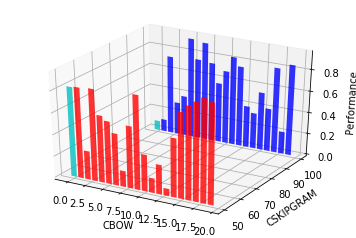

In [17]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'b' ], [50, 100]):
    xs = np.arange(20)
    ys = np.random.rand(20)
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('CBOW')
ax.set_ylabel('CSKIPGRAM')
ax.set_zlabel('Performance')

plt.show()


In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates
import pandas as pd

#compare = [(82,200,190),(80,83,85),(80,83,79)]
         
#data =[80,83,84,80,80,83,79,80,80,78,20,17,16,20,20,17,21,20,20,12]

data = pd.read_csv('result.csv')
x = data[:11]
y = data[5:11]
z = data[11:16]

fig = plt.figure()
ax = Axes3D(fig)
for c, z in zip(['r', 'b'], [20, 100]):
    xs = np.array(data)
    ys = np.random.rand(20)
    ax.bar(xs, ys, zs=z, zdir='y', color=c, alpha=0.8)

ax.set_xlabel('CBOW & SKIPGRAM')
ax.set_ylabel('Cosine distances')
ax.set_zlabel('performances')

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 3 or scalar

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

#data = np.genfromtxt('300.txt')
data =[80,83,84,80,80,83,79,80,80,78,20,17,16,20,20,17,21,20,20,12]
#x = data[:6]
#y = data[5:11]
#z = data[11:16]

xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))

X, Y = np.meshgrid(xi, yi)
z = griddata(x, y, z, xi, yi)



surf = ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap=cm.jet,
                       linewidth=1, antialiased=True)

ax.set_zlim3d(np.min(Z), np.max(Z))
fig.colorbar(surf)

plt.show()

ValueError: x, y and z must be equal-length 1-D arrays

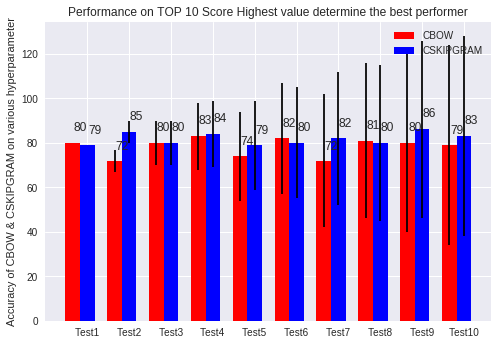

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
N = 10
#cbow= (83,110, 85, 80, 83,82,115,115)
cbow = (80,72,80,83,74,82,72,81,80,79)
distances1= (0, 5, 10, 15, 20,25,30,35,40,45)
#distances1= (10, 50, 100, 150, 200,250,300,350)
ind = np.arange(N)  # the x locations for the cosine distances
width = 0.35     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, cbow, width, color='r', yerr=distances1)
#ax.axhline(linewidth=4,)        # inc. width of x-axis and color it green
 
#cskipgram = (83, 79, 80, 80, 78,53,70,110)
cskipgram = (79,85,80,84,79,80,82,80,86,83)
distances2= (0,5,10,15,20,25,30,35,40,45)
#distances2= (10, 50, 100, 150, 200,250,300,350)
rects2 = ax.bar(ind + width, cskipgram, width, color='b', yerr=distances2)
#ax.axvline(linewidth=4)
# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy of CBOW & CSKIPGRAM on various hyperparameter')
#ax.set_label('lower the value ,better it is')
ax.set_title('Performance on TOP 10 Score'+ " "+ 'Highest value determine the best performer')
#ax.set_title('Cosine similarity lower')
ax.set_xticks(ind + width)
#pylab.ylim[0,100]
#ax.set_xticklabels(('(6,1e-3)','(7,1e-3)','(8,1e-3)','(9,1e-3)','(10,1e-3)','(5,1e-3)','(10,1e-4)','(10,1e-5)'))
ax.set_xticklabels(('Test1','Test2','Test3','Test4','Test5','Test6','Test7','Test8','Test9','Test10'))

ax.legend((rects1[0], rects2[0]), ('CBOW', 'CSKIPGRAM'))


def autolabel(rects):
    
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width(), 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()